**СДАЕТСЯ С ИСПОЛЬЗОВАНИЕМ ВОЗМОЖНОСТИ СДАТЬ ДЗ ПОСЛЕ МЯГКОГО ДЕДЛАЙНА БЕЗ ПОТЕРИ БАЛЛОВ**

## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [5]:
X.dropna(inplace = True)

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_train_temp = pd.DataFrame(zip(X_train[0],X_train[4]))
X_test_temp = pd.DataFrame(zip(X_test[0],X_test[4]))
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_25 = KNeighborsClassifier(n_neighbors = 25)
knn_1.fit(X_train_temp, y_train)
knn_3.fit(X_train_temp, y_train)
knn_5.fit(X_train_temp, y_train)
knn_10.fit(X_train_temp, y_train)
knn_15.fit(X_train_temp, y_train)
knn_25.fit(X_train_temp, y_train)
y_pred_1 = knn_1.predict(X_test_temp)
y_pred_3 = knn_3.predict(X_test_temp)
y_pred_5 = knn_5.predict(X_test_temp)
y_pred_10 = knn_10.predict(X_test_temp)
y_pred_15 = knn_15.predict(X_test_temp)
y_pred_25 = knn_25.predict(X_test_temp)
y_pred_train_1 = knn_1.predict(X_train_temp)
y_pred_train_3 = knn_3.predict(X_train_temp)
y_pred_train_5 = knn_5.predict(X_train_temp)
y_pred_train_10 = knn_10.predict(X_train_temp)
y_pred_train_15 = knn_15.predict(X_train_temp)
y_pred_train_25 = knn_25.predict(X_train_temp)
print("NN", "Test", "Train")
print("1",round(metrics.accuracy_score(y_test, y_pred_1),4),round(metrics.accuracy_score(y_train, y_pred_train_1),4))
print("3",round(metrics.accuracy_score(y_test, y_pred_3),4),round(metrics.accuracy_score(y_train, y_pred_train_3),4))
print("5",round(metrics.accuracy_score(y_test, y_pred_5),4),round(metrics.accuracy_score(y_train, y_pred_train_5),4))
print("10",round(metrics.accuracy_score(y_test, y_pred_10),4),round(metrics.accuracy_score(y_train, y_pred_train_10),4))
print("15",round(metrics.accuracy_score(y_test, y_pred_15),4),round(metrics.accuracy_score(y_train, y_pred_train_15),4))
print("25",round(metrics.accuracy_score(y_test, y_pred_25),4),round(metrics.accuracy_score(y_train, y_pred_train_25),4))

NN Test Train
1 0.6296 0.9919
3 0.6481 0.7742
5 0.7037 0.7661
10 0.537 0.7258
15 0.5741 0.7339
25 0.6111 0.7177


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [57]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [58]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

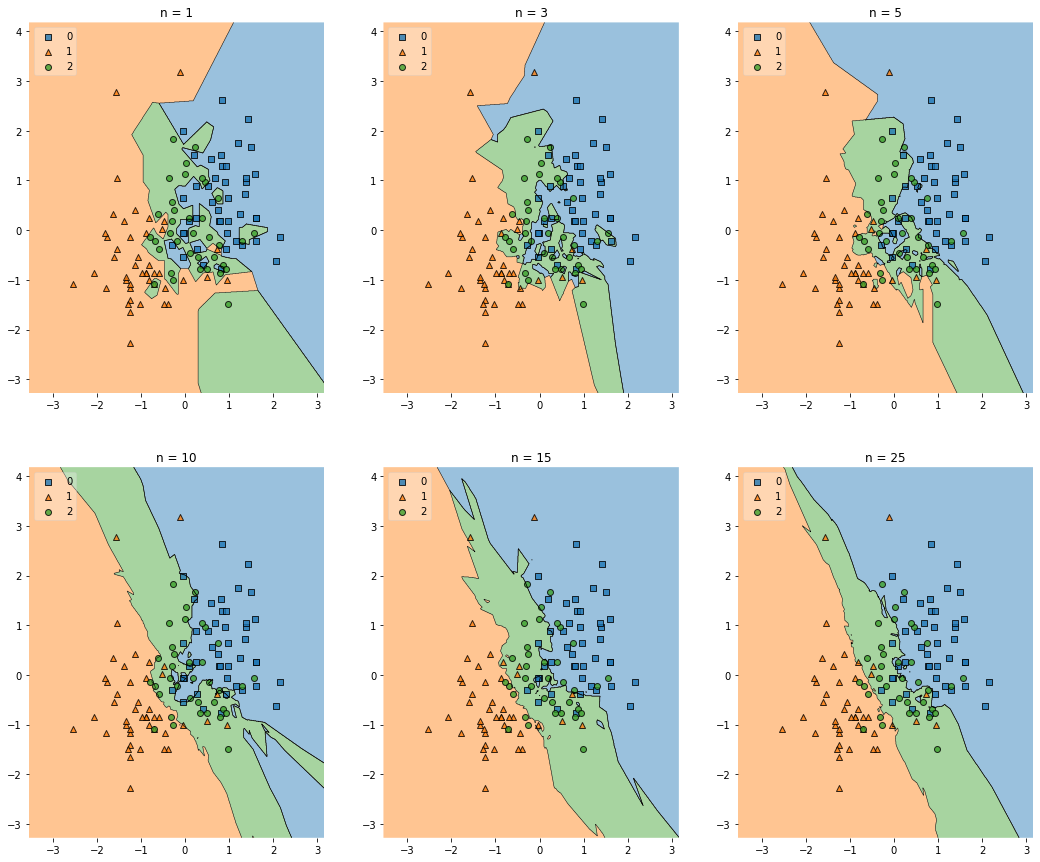

In [59]:
# взято из http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
X_train_temp = np.array(X_train_temp)
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18,15))

labels = ['n = 1', 'n = 3', 'n = 5', 'n = 10', 'n = 15', 'n = 25']
for clf, lab, grd in zip([knn_1,knn_3,knn_5,knn_10,knn_15,knn_25],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train_temp, y = y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Мне кажется что оптимальным числом соседей является 5 соседей поскольку при нем классификатор выдает хороший результат и на трейне и на тесте показывает хорошие результаты поскольку он учитывает достаточное колличество соседей чтобы верно определить большую часть тестовой выборки также соседей не слишком много и слишком дальние соседи не вносят свой негативный вклад** 

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

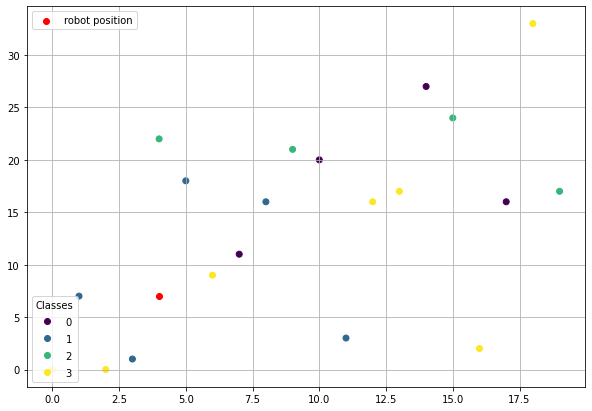

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        knn_dot = KNeighborsClassifier(n_neighbors = k)
        knn_dot.fit(landmarks, classes)
        # Store the history of movements
        self.trajectory = list()
        self.trajectory.append(initial_position.tolist())
        
        
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = knn_dot
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        result = np.random.binomial(1,0.2)
        if result == 1:
            self.trajectory.append([1, 0])
        else:
            clas = self.knn.predict([self.trajectory[-1]])
            self.trajectory.append(self.mapping[int(clas)].tolist())
        


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = list()
    traj.append(initial_position.tolist())
    for i in range(1, n_movements):
        traj.append([traj[-1][0] + robot.trajectory[i][0],traj[-1][1] + robot.trajectory[i][1]])
    traj = np.array(traj)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

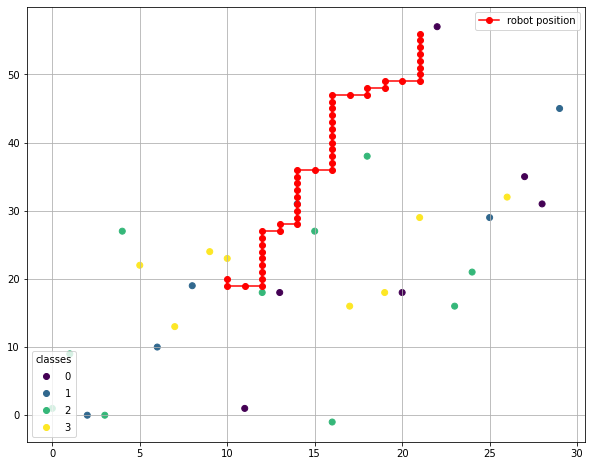

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

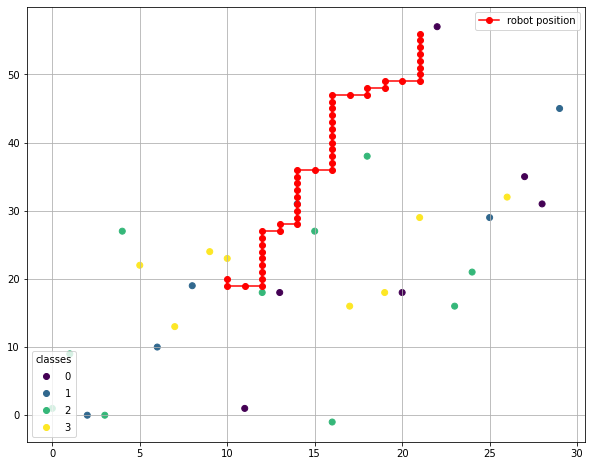

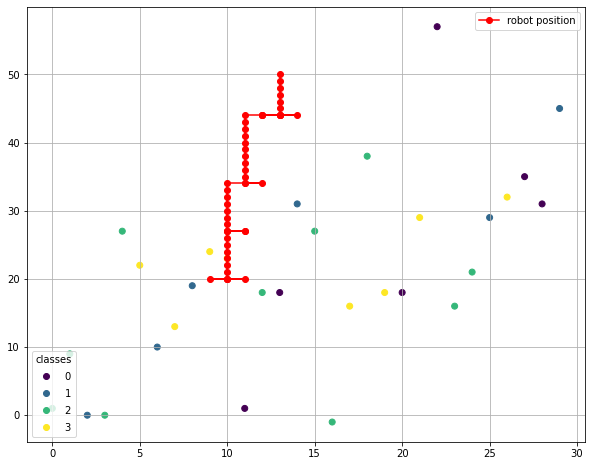

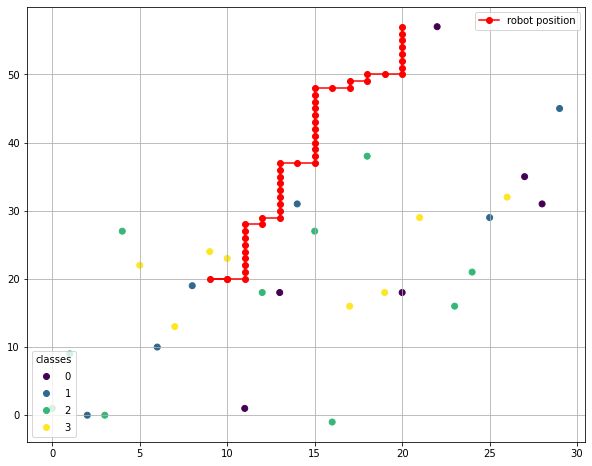

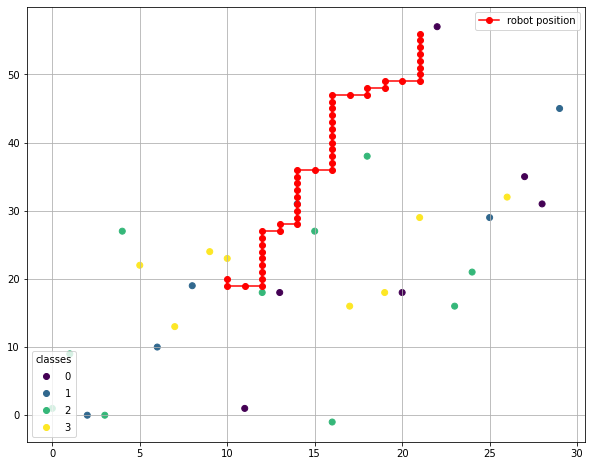

In [15]:
x = np.arange(30)
fig = conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)
fig = conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
fig = conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)
fig = conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

**При большом колличестве соседей графики ведут себя схоже так что я думаю осмысленно назначая классы можно в какой-то мере управлять поведением робота**

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [79]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [80]:
data = data.dropna()


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [81]:
headers = ('carat','cut','color','clarity','depth','table','x','y','z')
data_x = pd.DataFrame(zip(data['carat'],data['cut'],data['color'],data['clarity'],data['depth'],data['table'],data['x'],data['y'],data['z']),columns = headers)
data_y = pd.DataFrame(data['price'])

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [82]:
categorial = ['cut','color','clarity']
for feature in data.columns:
    if feature in categorial:
        one_hot_temp = pd.get_dummies(data_x[feature])
        data_x = data_x.drop(feature,axis = 1)
        data_x = pd.concat([data_x,one_hot_temp],axis = 1)
data_x

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=10)
y_train

,price
23590,11605
20122,8585
41416,1226
19392,8058
48949,2047
...,...
28017,658
50496,2269
29199,694
40061,1113


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))


1268454.955961559
1303126.748846737


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [85]:
print(reg.coef_)

[[11178.92564786   -51.33781166   -30.42503765  -857.78684134
     72.18469068  -343.69187868  -608.9842503     16.66815822
    251.84164281   184.84981128   155.624638     810.16549896
    605.84772546   541.91097169   342.24450789  -158.78346849
   -632.33579255 -1509.04944296 -3847.02419567  1519.24204362
   -143.27826691 -1102.45932839   776.42704839   460.5320942
   1199.41410651  1137.14649826]]


**Carat, X, Z**

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [90]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 10)
ridge = linear_model.Ridge(alpha = 10)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
print(lasso.coef_)
print(ridge.coef_)


[ 9720.26479196   -76.30068878   -43.09465428  -455.21980724
    -0.            -0.          -459.91481108   -21.33872196
    66.5903103      0.             0.           319.20898633
   155.44664712   100.31231989     0.          -433.21647155
  -829.46176543 -1592.15053703 -3531.34376423   673.30871472
  -638.74868119 -1527.668388     155.01650965   -22.21404029
   525.19933262   506.44473758]
[[10886.45884834   -47.45459515   -30.15752862  -748.55807877
     71.99955318  -330.38747794  -613.24226494    15.83076427
    253.18905531   186.11489249   158.10755288   802.45669147
    599.32031676   534.24229406   337.87657225  -158.33972305
   -624.79687123 -1490.75928025 -3761.74869091  1501.95689098
   -157.54578683 -1108.25554432   761.95360125   448.17985223
   1189.64352376  1125.81615383]]


**Веса уменьшились не сильно из этого напрашивается вывод что проблема мультиколлинеарности проявлялась не слишком сильно**

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\golov\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72950309.46487427, tolerance: 59327375.88300501
  model = cd_fast.enet_coordinate_descent(


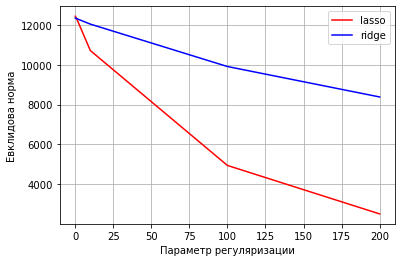

In [118]:
lasso_0 = linear_model.Lasso(alpha = 0.1)
lasso_1 = linear_model.Lasso(alpha = 1)
lasso_10 = linear_model.Lasso(alpha = 10)
lasso_100 = linear_model.Lasso(alpha = 100)
lasso_200 = linear_model.Lasso(alpha = 200)
ridge_0 = linear_model.Ridge(alpha = 0.1)
ridge_1 = linear_model.Ridge(alpha = 1)
ridge_10 = linear_model.Ridge(alpha = 10)
ridge_100 = linear_model.Ridge(alpha = 100)
ridge_200 = linear_model.Ridge(alpha = 200)
lasso_0.fit(X_train, y_train)
ridge_0.fit(X_train, y_train)
lasso_1.fit(X_train, y_train)
ridge_1.fit(X_train, y_train)
lasso_10.fit(X_train, y_train)
ridge_10.fit(X_train, y_train)
lasso_100.fit(X_train, y_train)
ridge_100.fit(X_train, y_train)
lasso_200.fit(X_train, y_train)
ridge_200.fit(X_train, y_train)
x = [0.1,1,10,100,200]
y = [np.linalg.norm(lasso_0.coef_),np.linalg.norm(lasso_1.coef_),np.linalg.norm(lasso_10.coef_),np.linalg.norm(lasso_100.coef_),np.linalg.norm(lasso_200.coef_)]
y_1 = [np.linalg.norm(ridge_0.coef_),np.linalg.norm(ridge_1.coef_),np.linalg.norm(ridge_10.coef_),np.linalg.norm(ridge_100.coef_),np.linalg.norm(ridge_200.coef_)]
plt.plot(x,y,'r',label = 'lasso')
plt.plot(x,y_1,'b',label = 'ridge')
plt.grid(True)
plt.ylabel('Евклидова норма')
plt.xlabel('Параметр регуляризации')
plt.legend(loc = 'best')
plt.show()

**Lasso используют для отбора признаков поскольку она часто зануляет слишком большие коэффициенты оставляя только более менее адекватно подобранные числа**


**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [131]:
lassocv = linear_model.LassoCV(n_alphas = 10,cv = 5).fit(X_train,y_train.ravel())
for i in lassocv.mse_path_:
    i /= i.mean()
print(lassocv.mse_path_)
print(lassocv.alphas_)

[[1.02178534 1.01832132 1.01001847 0.97790769 0.97196718]
 [1.02004986 1.01961908 1.01516916 0.99470764 0.95045426]
 [1.0576331  1.00320101 1.00486301 1.01008051 0.92422237]
 [1.13505478 0.97777673 0.98248461 1.00452798 0.9001559 ]
 [1.18627537 0.96012787 0.96808011 1.01233822 0.87317843]
 [1.02320001 1.00904107 1.01249141 1.02844914 0.92681837]
 [0.99504498 1.03113832 1.01813064 1.03346806 0.922218  ]
 [1.00120213 1.02634945 1.00305653 1.03937826 0.93001363]
 [1.01039876 1.03357237 0.99101179 1.03158499 0.93343209]
 [1.01573553 1.0374778  0.98564378 1.02758983 0.93355306]]
[3914.62623353 1817.00854133  843.3806556   391.46262335  181.70085413
   84.33806556   39.14626234   18.17008541    8.43380656    3.91462623]


**Наибольшее качество дает 181**

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [133]:
lasso_final = linear_model.Lasso(alpha = 181)
lasso_final.fit(X_train, y_train)
print(lasso_final.coef_)


[ 573.51859535    0.          -30.43140469 2247.44766207  521.35549476
    0.           -0.           -0.            0.           -0.
    0.            0.            0.            0.            0.
   -0.           -0.           -0.           -0.            0.
   -0.           -0.            0.            0.            0.
    0.        ]


**Наиболее информативные carat, y, z, неинформативными оказались остальные признаки**

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [136]:
y_pred_final = lasso_final.predict(X_test)
print(mean_squared_error(y_test, y_pred_final))

3428504.3872613534


**Лучше получилась обычная линейная регрессия видимо Lasso слишком много признаков отсеяла и из-за этого потеряла в точности**